# RL tabular MM analysis
Set parameters, optionally run `config` with `--mm-type rl_tabular`, then plot PnL, rewards, actions, inventory, and spread.

In [43]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)

params = {
    # run controls
    'run_rl': True,
    'run_simple': True,

    # core config
    'config': 'config',
    'ticker': 'AAPL',
    'date': '20000101',
    'start': '00:00:01',
    'end': '01:00:00',
    'seed': 424,

    # market makers
    'mm_type': 'RLMM0',
    'mm_type_simple': 'simple',
    'mm_wake': '3s',
    'mm_size': 10,
    'mm_inventory_limit': 100,

    # OU / fundamentals
    'fund_vol': 5e-9,           # sigma_s in oracle diffusion off below
    'ou_half_life': '30m',
    'value_r_bar': 100_000,     # cents ($1000)
    'value_sigma_n': None,
    'value_kappa': 3.85e-13,    # ln(2)/30m per ns
    'value_lambda_a': None,
    'sigma_s': 0,               # diffusion term off

    # megashock (oracle) settings
    'megashock_lambda_a': 2.7e-18,
    'megashock_mean': 1e3,
    'megashock_var': 5e4,

    # logging
    'log_name': 'RLMM0_seed_123456',
    'simple_log_name': 'simple_seed_123456',

    # noise traders
    'noise_count': 20,
    'noise_cash': 10_000_000,
    'noise_order_block': 1,
    'noise_wake_freq': '10s',

    # value traders
    'value_count': 0,
    'value_cash': 10_000_000,

    # ZI traders
    'zi_count': 0,
    'zi_cash': 10_000_000,
    'zi_sigma_n': 10_000,
    'zi_sigma_s': None,
    'zi_kappa': None,
    'zi_r_bar': None,
    'zi_q_max': 10,
    'zi_sigma_pv': 5e4,
    'zi_R_min': 0,
    'zi_R_max': 100,
    'zi_eta': 1.0,
    'zi_lambda_a': 1e-12,

    # HBL / momentum
    'hbl_count': 0,
    'momentum_count': 0,
    'momentum_cash': 10_000_000,
    'momentum_min_size': 1,
    'momentum_max_size': 10,
    'momentum_wake': '20s',
}

repo_root = Path('..')
params['log_dir'] = repo_root / 'log' / params['log_name']
params['simple_log_dir'] = repo_root / 'log' / params['simple_log_name']

print('RL log dir:', params['log_dir'].resolve())
print('Simple log dir:', params['simple_log_dir'].resolve())


RL log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/RLMM0_seed_123456
Simple log dir: /Users/salim/Desktop/Columbia/Assignments_Columbia/S3/Reinforcement Learning/Project/ABIDES/abides/log/simple_seed_123456


## Run simulation (optional)

In [44]:
def add_opt(cmd, flag, value):
    if value is not None:
        cmd.extend([flag, str(value)])

if params['run_rl']:
    cmd = [
        'python', 'main.py',
        '-c', params['config'],
        '-t', params['ticker'],
        '-d', params['date'],
        '--start-time', params['start'],
        '--end-time', params['end'],
        '--seed', str(params['seed']),
        '--log_dir', params['log_name'],
        '--mm-type', params['mm_type'],
        '--mm-wake-up-freq', params['mm_wake'],
        '--mm-size', str(params['mm_size']),
        '--mm-inventory-limit', str(params['mm_inventory_limit']),
        '--fund-vol', str(params['fund_vol']),
        '--noise-count', str(params['noise_count']),
        '--noise-cash', str(params['noise_cash']),
        '--noise-order-block', str(params['noise_order_block']),
        '--value-count', str(params['value_count']),
        '--value-cash', str(params['value_cash']),
        '--zi-count', str(params['zi_count']),
        '--zi-cash', str(params['zi_cash']),
        '--zi-sigma-n', str(params['zi_sigma_n']),
        '--zi-q-max', str(params['zi_q_max']),
        '--zi-sigma-pv', str(params['zi_sigma_pv']),
        '--zi-R-min', str(params['zi_R_min']),
        '--zi-R-max', str(params['zi_R_max']),
        '--zi-eta', str(params['zi_eta']),
        '--zi-lambda-a', str(params['zi_lambda_a']),
        '--hbl-count', str(params['hbl_count']),
        '--momentum-count', str(params['momentum_count']),
        '--momentum-cash', str(params['momentum_cash']),
        '--momentum-min-size', str(params['momentum_min_size']),
        '--momentum-max-size', str(params['momentum_max_size']),
        '--momentum-wake', params['momentum_wake'],
    ]
    add_opt(cmd, '--value-sigma-n', params['value_sigma_n'])
    add_opt(cmd, '--value-r-bar', params['value_r_bar'])
    add_opt(cmd, '--value-kappa', params['value_kappa'])
    add_opt(cmd, '--value-lambda-a', params['value_lambda_a'])
    add_opt(cmd, '--zi-sigma-s', params['zi_sigma_s'])
    add_opt(cmd, '--zi-kappa', params['zi_kappa'])
    add_opt(cmd, '--zi-r-bar', params['zi_r_bar'])
    print('Running RL:', ' '.join(cmd))
    result = subprocess.run(cmd, cwd=repo_root)
    print('RL return code:', result.returncode)
else:
    print('Skipping RL run; set params["run_rl"] = True to execute.')

if params['run_simple']:
    cmd_simple = [
        'python', 'main.py',
        '-c', params['config'],
        '-t', params['ticker'],
        '-d', params['date'],
        '--start-time', params['start'],
        '--end-time', params['end'],
        '--seed', str(params['seed']),
        '--log_dir', params['simple_log_name'],
        '--mm-type', params['mm_type_simple'],
        '--mm-wake-up-freq', params['mm_wake'],
        '--mm-size', str(params['mm_size']),
        '--mm-inventory-limit', str(params['mm_inventory_limit']),
        '--fund-vol', str(params['fund_vol']),
        '--noise-count', str(params['noise_count']),
        '--noise-cash', str(params['noise_cash']),
        '--noise-order-block', str(params['noise_order_block']),
        '--value-count', str(params['value_count']),
        '--value-cash', str(params['value_cash']),
        '--zi-count', str(params['zi_count']),
        '--zi-cash', str(params['zi_cash']),
        '--zi-sigma-n', str(params['zi_sigma_n']),
        '--zi-q-max', str(params['zi_q_max']),
        '--zi-sigma-pv', str(params['zi_sigma_pv']),
        '--zi-R-min', str(params['zi_R_min']),
        '--zi-R-max', str(params['zi_R_max']),
        '--zi-eta', str(params['zi_eta']),
        '--zi-lambda-a', str(params['zi_lambda_a']),
        '--hbl-count', str(params['hbl_count']),
        '--momentum-count', str(params['momentum_count']),
        '--momentum-cash', str(params['momentum_cash']),
        '--momentum-min-size', str(params['momentum_min_size']),
        '--momentum-max-size', str(params['momentum_max_size']),
        '--momentum-wake', params['momentum_wake'],
    ]
    add_opt(cmd_simple, '--value-sigma-n', params['value_sigma_n'])
    add_opt(cmd_simple, '--value-r-bar', params['value_r_bar'])
    add_opt(cmd_simple, '--value-kappa', params['value_kappa'])
    add_opt(cmd_simple, '--value-lambda-a', params['value_lambda_a'])
    add_opt(cmd_simple, '--zi-sigma-s', params['zi_sigma_s'])
    add_opt(cmd_simple, '--zi-kappa', params['zi_kappa'])
    add_opt(cmd_simple, '--zi-r-bar', params['zi_r_bar'])
    print('Running simple MM:', ' '.join(cmd_simple))
    result_simple = subprocess.run(cmd_simple, cwd=repo_root)
    print('Simple return code:', result_simple.returncode)
else:
    print('Skipping simple MM run; set params["run_simple"] = True to execute.')



Running RL: python main.py -c config -t AAPL -d 20000101 --start-time 00:00:01 --end-time 01:00:00 --seed 424 --log_dir RLMM0_seed_123456 --mm-type RLMM0 --mm-wake-up-freq 3s --mm-size 10 --mm-inventory-limit 100 --fund-vol 5e-09 --noise-count 20 --noise-cash 10000000 --value-count 0 --value-cash 10000000 --zi-count 0 --zi-cash 10000000 --zi-sigma-n 10000 --zi-q-max 10 --zi-sigma-pv 50000.0 --zi-R-min 0 --zi-R-max 100 --zi-eta 1.0 --zi-lambda-a 1e-12 --hbl-count 0 --momentum-count 0 --momentum-cash 10000000 --momentum-min-size 1 --momentum-max-size 10 --momentum-wake 20s --value-r-bar 100000 --value-kappa 3.85e-13
Beginning of the simulation

[config] start_wall=2025-12-05 18:25:33.778109
[config] seed=424

[kernel] t=2001-01-01 00:00:00 processed=0
Final holdings for NoiseTrader 1: { AAPL: -79, CASH: 17906772 }.  Marked to market: 10006614
Final holdings for NoiseTrader 2: { AAPL: 90, CASH: 1001944 }.  Marked to market: 10002124
Final holdings for NoiseTrader 3: { AAPL: -608, CASH: 70

Processing orderbook log: 100%|██████████| 9881/9881 [00:01<00:00, 6377.29it/s] 


[exchange] order book logging duration: 0:00:01.861884
[exchange] order book archival complete
[kernel] queue_elapsed=0 days 00:00:04.503929 messages=66266 rate=14712.9/s
[kernel] simulation ending
[config] end_wall=2025-12-05 18:25:40.902934
[config] duration=0:00:07.124825
RL return code: 0
Running simple MM: python main.py -c config -t AAPL -d 20000101 --start-time 00:00:01 --end-time 01:00:00 --seed 424 --log_dir simple_seed_123456 --mm-type simple --mm-wake-up-freq 3s --mm-size 10 --mm-inventory-limit 100 --fund-vol 5e-09 --noise-count 20 --noise-cash 10000000 --value-count 0 --value-cash 10000000 --zi-count 0 --zi-cash 10000000 --zi-sigma-n 10000 --zi-q-max 10 --zi-sigma-pv 50000.0 --zi-R-min 0 --zi-R-max 100 --zi-eta 1.0 --zi-lambda-a 1e-12 --hbl-count 0 --momentum-count 0 --momentum-cash 10000000 --momentum-min-size 1 --momentum-max-size 10 --momentum-wake 20s --value-r-bar 100000 --value-kappa 3.85e-13
Beginning of the simulation

[config] start_wall=2025-12-05 18:25:41.629959

Processing orderbook log: 100%|██████████| 9110/9110 [00:00<00:00, 22855.11it/s]


[exchange] order book logging duration: 0:00:00.521812
[exchange] order book archival complete
[kernel] queue_elapsed=0 days 00:00:03.795030 messages=63546 rate=16744.5/s
[kernel] simulation ending
[config] end_wall=2025-12-05 18:25:46.605466
[config] duration=0:00:04.975507
Simple return code: 0


### MTM comparison (RL vs simple)


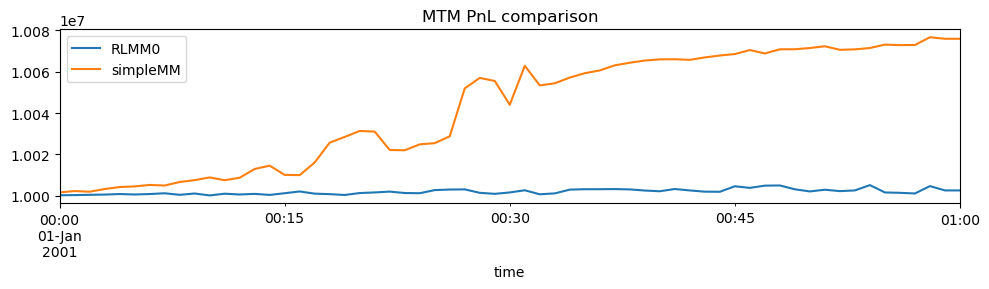

In [56]:
# MTM comparison (aligned on time index)
log_dir = params['log_dir']
simple_log_dir = params['simple_log_dir']

rl_files = sorted(log_dir.glob('RL_MM0_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

simple_files = sorted(simple_log_dir.glob('SIMPLE_MM_*.bz2'))
simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows.empty:
    rl_state = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

series = []
if rl_state is not None:
    series.append(rl_state['mtm'].rename('RLMM0'))
if simple_state is not None:
    series.append(simple_state['mtm'].rename('simpleMM'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1min').last()
    title = 'MTM PnL comparison' if len(series) > 1 else 'MTM PnL (RL only)'
    ax = df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No STATE events found; nothing to plot')


### Inventory comparison (RL vs simple)


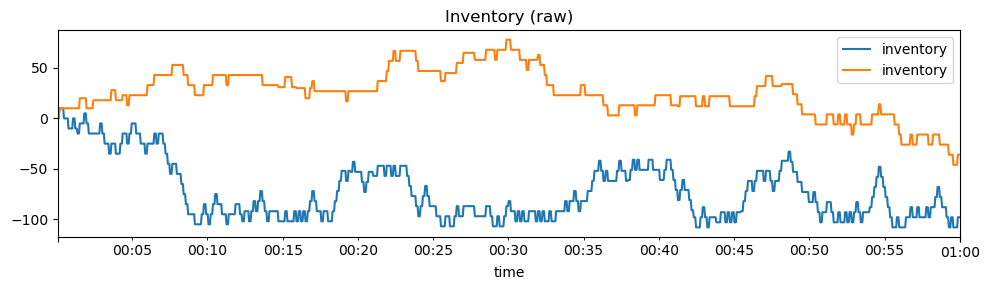

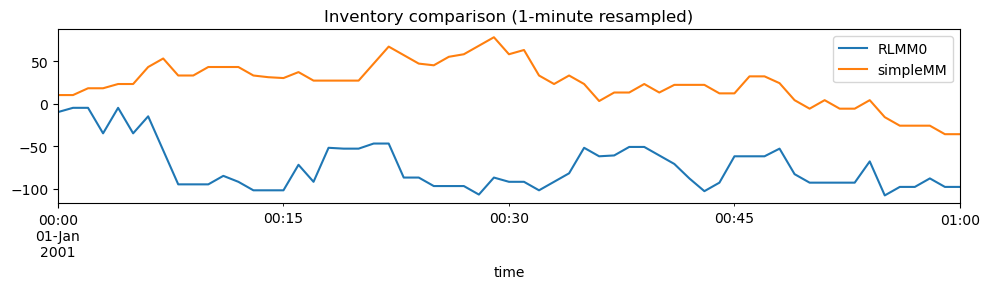

In [57]:
# Plot inventories on common time grid
log_dir = params['log_dir']
simple_log_dir = params['simple_log_dir']

rl_files = list(log_dir.glob('RL_MM0_*.bz2'))
rl_log = pd.read_pickle(rl_files[0]) if rl_files else pd.DataFrame()
state_rows_rl = rl_log[rl_log['EventType'] == 'STATE'] if not rl_log.empty else pd.DataFrame()

simple_state_rows = None
if simple_log_dir:
    simple_files = list(simple_log_dir.glob('SIMPLE_MM_*.bz2'))
    simple_log = pd.read_pickle(simple_files[0]) if simple_files else pd.DataFrame()
    simple_state_rows = simple_log[simple_log['EventType'] == 'STATE'] if not simple_log.empty else pd.DataFrame()

rl_state = None
simple_state = None
if not state_rows_rl.empty:
    rl_state = pd.DataFrame(list(state_rows_rl['Event'])).set_index('time')
    rl_state.index = pd.to_datetime(rl_state.index)
if simple_state_rows is not None and not simple_state_rows.empty:
    simple_state = pd.DataFrame(list(simple_state_rows['Event'])).set_index('time')
    simple_state.index = pd.to_datetime(simple_state.index)

# Plot raw inventories
if rl_state is not None:
    ax = rl_state[['inventory']].plot(figsize=(10,3), title='Inventory (raw)', label='RLMM0')
    if simple_state is not None:
        simple_state[['inventory']].plot(ax=ax, label='simpleMM')
    plt.legend()
    plt.tight_layout()
else:
    print('No RL STATE events found; nothing to plot')

# Aligned on 1-minute grid
series = []
if rl_state is not None:
    series.append(rl_state['inventory'].rename('RLMM0'))
if simple_state is not None:
    series.append(simple_state['inventory'].rename('simpleMM'))

if series:
    df = pd.concat(series, axis=1).sort_index()
    df_resampled = df.resample('1min').last()
    title = 'Inventory comparison (1-minute resampled)' if len(series) > 1 else 'Inventory (1-minute resampled, RL only)'
    df_resampled.plot(figsize=(10,3), title=title)
    plt.legend()
    plt.tight_layout()
else:
    print('No inventory series available to plot')


### Spread over time (RL)


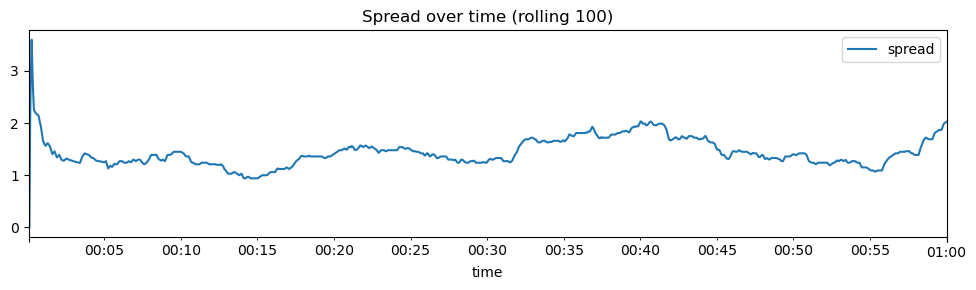

In [58]:
if rl_state is not None and not rl_state.empty and 'spread' in rl_state.columns:
    spread_smoothed = rl_state['spread'].rolling(window=100, min_periods=1).mean()
    spread_smoothed.plot(figsize=(10, 3), title='Spread over time (rolling 100)', legend=True)
    plt.tight_layout()
else:
    print('No spread data found in RL STATE events')


### Rewards and PnL per step

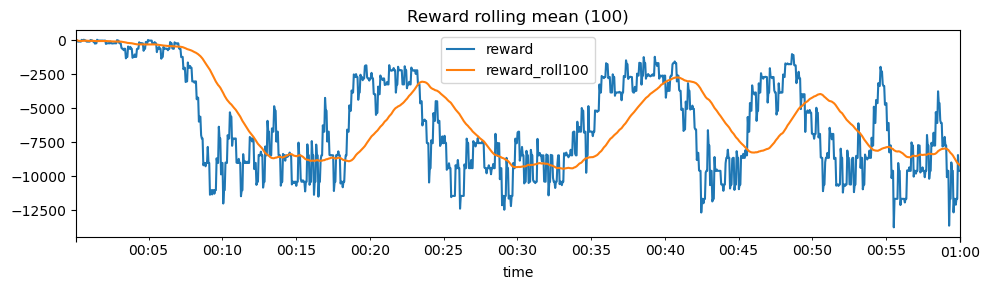

In [59]:
if rl_state is not None and not rl_state.empty:
    # Step reward
    rl_state['reward'].plot(figsize=(10,3), title='Step reward', label='reward')
    plt.legend()
    plt.tight_layout()

    # Rolling mean (100)
    rl_state['reward'].rolling(window=100, min_periods=1).mean().plot(figsize=(10,3), title='Reward rolling mean (100)', label='reward_roll100')
    plt.legend()
    plt.tight_layout()

    # Cumulative reward
    # rl_state['cum_reward'].plot(figsize=(10,3), title='Cumulative reward', label='cum_reward')
    # plt.legend()
    # plt.tight_layout()
else:
    print('No STATE events found in RL log')


### Actions over time and Q proxy

/var/folders/4d/b_50cxsx369cdz1pzpjf8md40000gn/T/ipykernel_3979/136164856.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq='5T'))


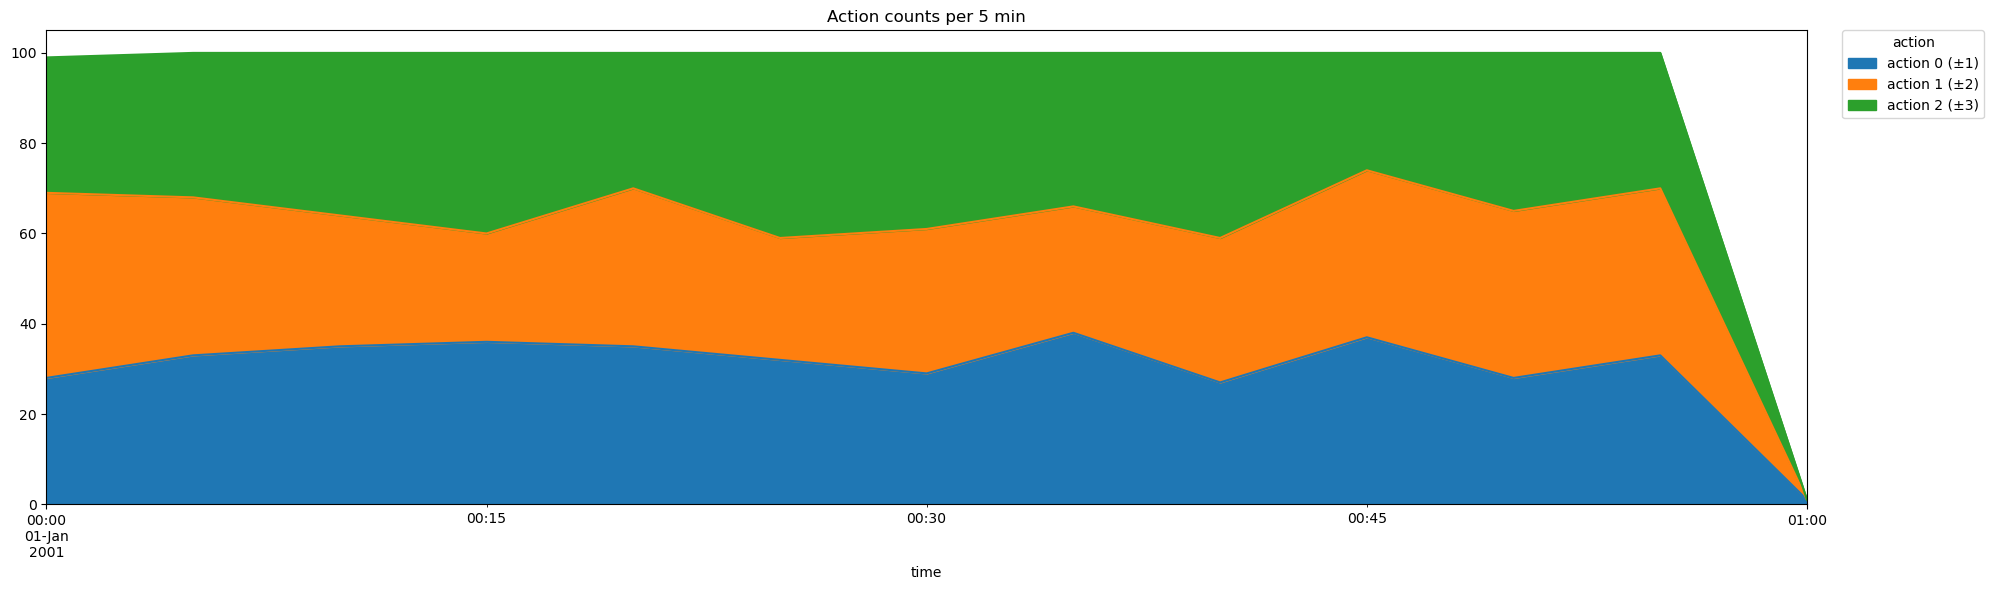

In [60]:
# Build action label map for RLMM0 (symmetric offsets)
offsets = [1, 2, 3]  # change if you used different offsets
action_labels = {i: f"action {i} (±{o})" for i, o in enumerate(offsets)}

# Use RL state
state_df = rl_state.copy() if rl_state is not None else pd.DataFrame()
if 'time' in state_df.columns:
    state_df['time'] = pd.to_datetime(state_df['time'])
    state_df = state_df.set_index('time')
state_df = state_df.sort_index()

if not state_df.empty:
    action_counts = (
        state_df['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )
    action_counts = action_counts.rename(columns=action_labels)
    ax = action_counts.plot.area(figsize=(20, 6), title='Action counts per 5 min')
    ax.legend(title='action', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


/var/folders/4d/b_50cxsx369cdz1pzpjf8md40000gn/T/ipykernel_3979/2323437729.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  .groupby(pd.Grouper(freq='5T'))


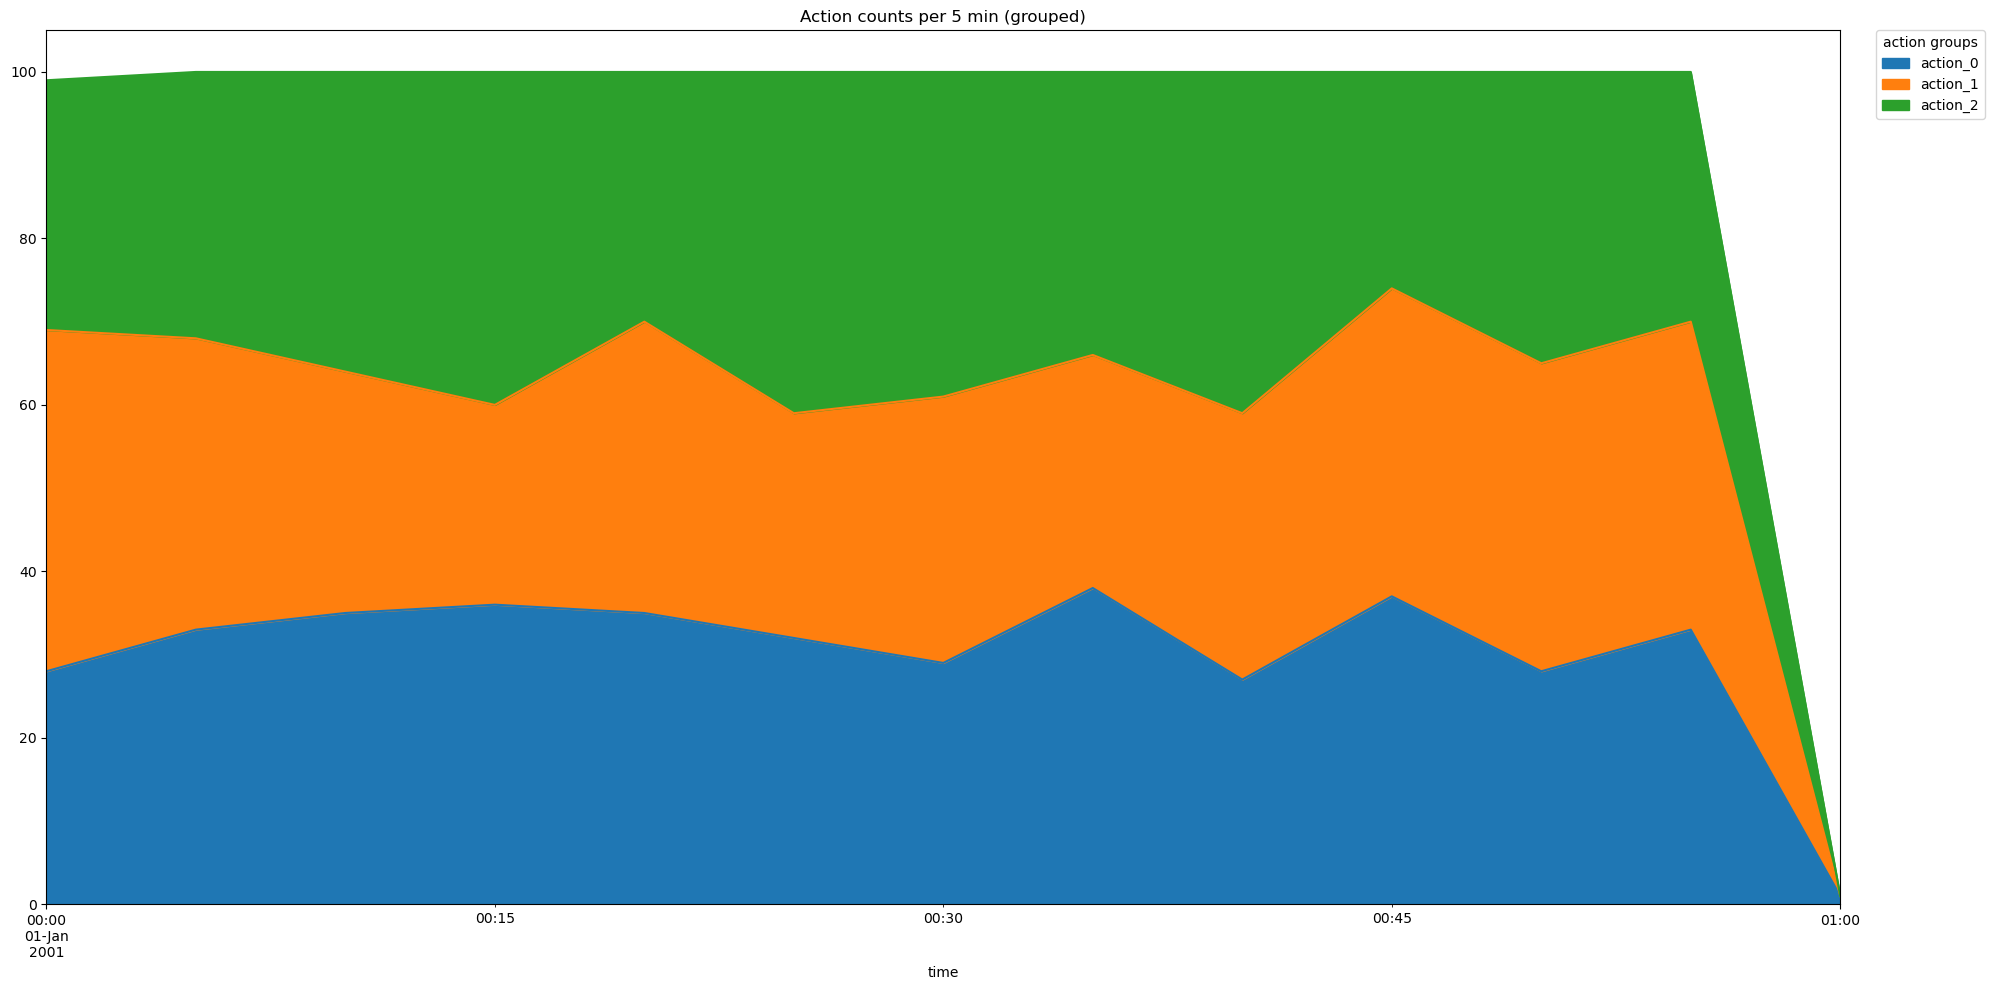

In [61]:
if rl_state is not None and not rl_state.empty:
    action_counts = (
        rl_state['last_action']
        .groupby(pd.Grouper(freq='5T'))
        .value_counts()
        .unstack(fill_value=0)
    )

    def sum_cols(df, cols):
        cols = [c for c in cols if c in df.columns]
        return df[cols].sum(axis=1) if cols else pd.Series(0, index=df.index)

    grouped = pd.DataFrame({
        'action_0': sum_cols(action_counts, [0]),
        'action_1': sum_cols(action_counts, [1]),
        'action_2': sum_cols(action_counts, [2]),
    })

    palette = {
        'action_0': '#1f77b4',
        'action_1': '#ff7f0e',
        'action_2': '#2ca02c',
    }

    ax = grouped.plot.area(
        figsize=(20, 10),
        color=[palette[c] for c in grouped.columns],
        title='Action counts per 5 min (grouped)',
    )
    ax.legend(title='action groups', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


### State visitation heatmap

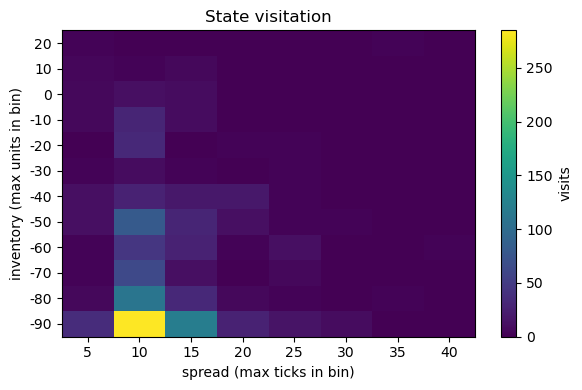

In [62]:
spread_bin_size = 5      # ticks
inventory_bin_size = 10  # units

if rl_state is not None and not rl_state.empty:
    visit = (
        rl_state.groupby(['inventory_bin', 'spread_bin'])
                .size()
                .unstack(fill_value=0)
                .sort_index()
    )
    inv_bins = visit.index.values
    spr_bins = visit.columns.values

    spr_labels = [(b + 1) * spread_bin_size for b in spr_bins]
    inv_labels = [(b + 1) * inventory_bin_size for b in inv_bins]

    plt.figure(figsize=(6, 4))
    plt.imshow(
        visit.values,
        origin='lower',
        aspect='auto',
        extent=[spr_bins.min() - 0.5, spr_bins.max() + 0.5,
                inv_bins.min() - 0.5, inv_bins.max() + 0.5],
    )
    plt.colorbar(label='visits')
    plt.xticks(ticks=spr_bins, labels=spr_labels)
    plt.yticks(ticks=inv_bins, labels=inv_labels)
    plt.xlabel('spread (max ticks in bin)')
    plt.ylabel('inventory (max units in bin)')
    plt.title('State visitation')
    plt.tight_layout()
else:
    print('No STATE events found in RL log')


## Order book and fundamental

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------------------------------------------------
# Directories (set these before running)
# ---------------------------------------------------------
# Example:
# log_dir = Path('../log/RLMM0_seed_123456')
# simple_log_dir = Path('../log/SIMPLEMM_seed_123456')

# ---------------------------------------------------------
# Helper to extract midprice from STATE logs
# ---------------------------------------------------------
def mid_from_state(log_dir: Path, pattern: str, label: str):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No files matching {pattern} in {log_dir}')
        return None

    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']

    if state_rows.empty:
        print(f'No STATE events found in {files[0].name}')
        return None

    df = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    df.index = pd.to_datetime(df.index)

    if 'mid' not in df.columns:
        print(f"No ‘mid’ field found in {files[0].name}")
        return None

    return df['mid'].rename(label)

# Your filenames: RL_MM0_0.bz2 and SIMPLE_MM_0.bz2
rl_mid = mid_from_state(log_dir, 'RL_MM0_*.bz2', 'RLMM0')
simple_mid = mid_from_state(simple_log_dir, 'SIMPLE_MM_*.bz2', 'simpleMM')

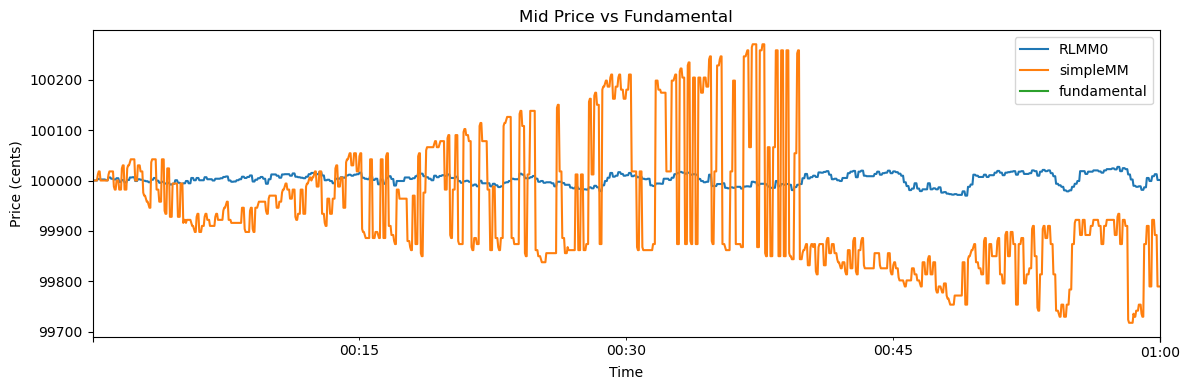

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

def mid_from_state(log_dir, pattern, label):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No {pattern} found in {log_dir}')
        return None
    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']
    if state_rows.empty:
        print(f'No STATE events in {files[0].name}')
        return None
    df = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    df.index = pd.to_datetime(df.index)
    if 'mid' not in df.columns:
        print(f"No 'mid' field in {files[0].name}")
        return None
    return df['mid'].rename(label)

def fundamental_series(log_dir):
    fund_file = next(log_dir.glob('fundamental_*.bz2'), None)
    if not fund_file:
        print(f'No fundamental_* file found in {log_dir}')
        return None
    fund = pd.read_pickle(fund_file)
    if 'FundamentalTime' in fund.columns and 'FundamentalValue' in fund.columns:
        s = fund.set_index('FundamentalTime')['FundamentalValue']
        s.index = pd.to_datetime(s.index)
        return s.rename('fundamental')
    s = fund.iloc[:, 0]
    s.index = pd.to_datetime(fund.index)
    return s.rename('fundamental')

rl_mid = mid_from_state(log_dir, 'RL_MM0_*.bz2', 'RLMM0')
simple_mid = mid_from_state(simple_log_dir, 'SIMPLE_MM_*.bz2', 'simpleMM')
fund = fundamental_series(log_dir)

series = [s for s in [rl_mid, simple_mid, fund] if s is not None]
if series:
    df_plot = pd.concat(series, axis=1).sort_index()
    df_plot.plot(figsize=(12, 4), title='Mid Price vs Fundamental')
    plt.xlabel('Time')
    plt.ylabel('Price (cents)')
    plt.tight_layout()
else:
    print('No series available to plot')


Using orderbook file: ORDERBOOK_AAPL_FULL.bz2
Could not detect bid/ask columns in orderbook.
Using fundamental file: fundamental_AAPL.bz2


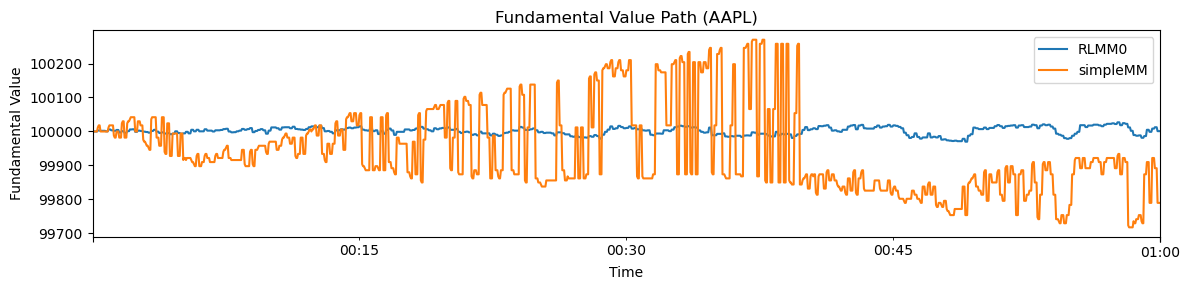

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------------------------------------------------
# Directories (set these before running)
# ---------------------------------------------------------
# Example:
# log_dir = Path('../log/RLMM0_seed_123456')
# simple_log_dir = Path('../log/SIMPLEMM_seed_123456')

def mid_from_state(log_dir: Path, pattern: str, label: str):
    files = sorted(log_dir.glob(pattern))
    if not files:
        print(f'No files matching {pattern} in {log_dir}')
        return None

    log = pd.read_pickle(files[0])
    state_rows = log[log['EventType'] == 'STATE']

    if state_rows.empty:
        print(f'No STATE events found in {files[0].name}')
        return None

    df = pd.DataFrame(list(state_rows['Event'])).set_index('time')
    df.index = pd.to_datetime(df.index)

    if 'mid' not in df.columns:
        print(f"No 'mid' field found in {files[0].name}")
        return None

    return df['mid'].rename(label)

# Your filenames: RL_MM0_0.bz2 and SIMPLE_MM_0.bz2
rl_mid = mid_from_state(log_dir,        'RL_MM0_*.bz2',    'RLMM0')
simple_mid = mid_from_state(simple_log_dir, 'SIMPLE_MM_*.bz2', 'simpleMM')

# ---------------------------------------------------------
# 1) Order book midprice from ORDERBOOK_AAPL_FULL.bz2
# ---------------------------------------------------------
orderbook_file = log_dir / 'ORDERBOOK_AAPL_FULL.bz2'
ob_mid = None

if orderbook_file.exists():
    print("Using orderbook file:", orderbook_file.name)
    ob = pd.read_pickle(orderbook_file)

    def find_col(columns, substrings):
        for col in columns:
            name = ' '.join(col) if isinstance(col, tuple) else str(col)
            lname = name.lower()
            if all(sub in lname for sub in substrings):
                return col
        return None

    bid_col = find_col(ob.columns, ['best', 'bid']) or find_col(ob.columns, ['bid', 'price'])
    ask_col = find_col(ob.columns, ['best', 'ask']) or find_col(ob.columns, ['ask', 'price'])

    if bid_col and ask_col:
        top = ob[[bid_col, ask_col]].copy()
        top.columns = ['best_bid_price', 'best_ask_price']
        top['mid'] = (top['best_bid_price'] + top['best_ask_price']) / 2

        # ensure datetime index if convertible
        try:
            top.index = pd.to_datetime(top.index)
        except Exception:
            pass

        ob_mid = top['mid'].rename('OB_mid')
    else:
        print("Could not detect bid/ask columns in orderbook.")
else:
    print("Orderbook file not found:", orderbook_file)

# ---------------------------------------------------------
# 2) Fundamental path from fundamental_AAPL.bz2
# ---------------------------------------------------------
fund_file = log_dir / 'fundamental_AAPL.bz2'
fund_series = None

if fund_file.exists():
    print("Using fundamental file:", fund_file.name)
    fundamental = pd.read_pickle(fund_file).reset_index()
    fundamental['FundamentalTime'] = pd.to_datetime(fundamental['FundamentalTime'])
    fundamental = fundamental.set_index('FundamentalTime')
    fund_series = fundamental['FundamentalValue'].rename('Fundamental')
else:
    print("Fundamental file not found:", fund_file)

# ---------------------------------------------------------
# 3) Plot 1: Midprices (RL, SIMPLE, OrderBook)
# ---------------------------------------------------------
mid_series = [s for s in [rl_mid, simple_mid, ob_mid] if s is not None]

if mid_series:
    mid_df = pd.concat(mid_series, axis=1).sort_index()
    ax = mid_df.plot(figsize=(12, 4),
                     title="Mid Price Comparison (RLMM0 vs simpleMM vs OrderBook)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Mid Price (cents)")
    plt.tight_layout()
else:
    print("No midprice series available to plot.")

# ---------------------------------------------------------
# 4) Plot 2: Fundamental only
# ---------------------------------------------------------
if fund_series is not None:
    ax2 = fund_series.sort_index().plot(figsize=(12, 3),
                                        title="Fundamental Value Path (AAPL)")
    ax2.set_xlabel("Time")
    ax2.set_ylabel("Fundamental Value")
    plt.tight_layout()
else:
    print("No fundamental series available to plot.")

### Q-values over time


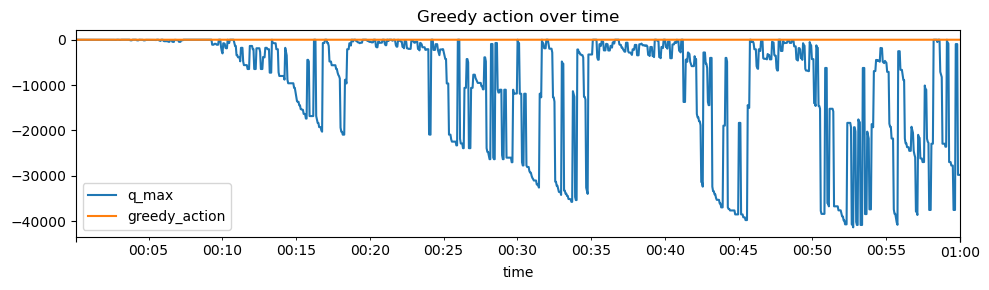

In [65]:
if rl_state is not None and not rl_state.empty and 'q_max' in rl_state.columns:
    rl_state['q_max'].plot(figsize=(10,3), title='Max Q for current state', label='q_max')
    plt.legend()
    plt.tight_layout()
    if 'greedy_action' in rl_state.columns:
        rl_state['greedy_action'].plot(figsize=(10,3), title='Greedy action over time', label='greedy_action')
        plt.legend()
        plt.tight_layout()
else:
    print('No Q info in STATE events')
